In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Importing data

In [2]:
df = pd.read_csv("Experiments.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

Looking at replacement fault rates for GCC

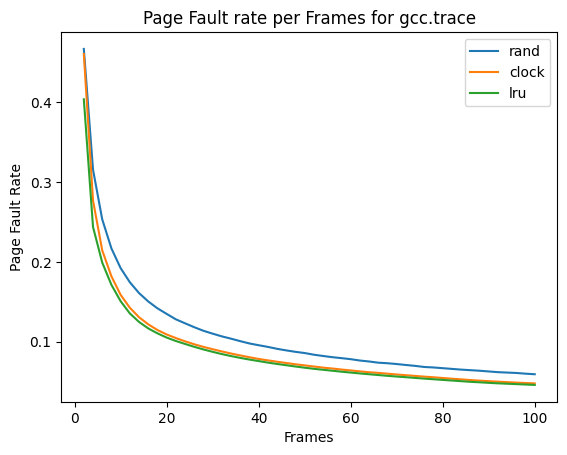

In [3]:
rand_gcc = df[ (df["File"] == "gcc.trace") & (df["Replacement"] == "rand") ]
clock_gcc = df[ (df["File"] == "gcc.trace") & (df["Replacement"] == "clock") ]
lru_gcc = df[ (df["File"] == "gcc.trace") & (df["Replacement"] == "lru") ]

# plotting
plt.title("Page Fault rate per Frames for gcc.trace")
plt.plot(rand_gcc["Frames"], rand_gcc["Page_Fault_rate"], label="rand")
plt.plot(clock_gcc["Frames"], clock_gcc["Page_Fault_rate"], label="clock")
plt.plot(lru_gcc["Frames"], lru_gcc["Page_Fault_rate"], label="lru")

plt.xlabel("Frames")
plt.ylabel("Page Fault Rate")
plt.legend()


Looking at replacement fault rates for swim

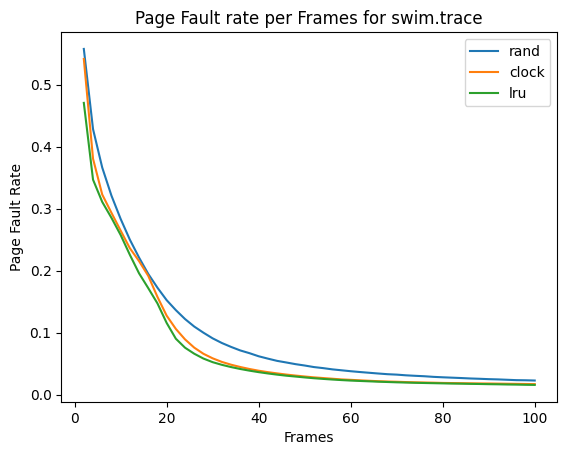

In [4]:
rand_swim = df[ (df["File"] == "swim.trace") & (df["Replacement"] == "rand") ]
clock_swim = df[ (df["File"] == "swim.trace") & (df["Replacement"] == "clock") ]
lru_swim = df[ (df["File"] == "swim.trace") & (df["Replacement"] == "lru") ]

# plotting
plt.title("Page Fault rate per Frames for swim.trace")
plt.plot(rand_swim["Frames"], rand_swim["Page_Fault_rate"], label="rand")
plt.plot(clock_swim["Frames"], clock_swim["Page_Fault_rate"], label="clock")
plt.plot(lru_swim["Frames"], lru_swim["Page_Fault_rate"], label="lru")

plt.xlabel("Frames")
plt.ylabel("Page Fault Rate")
plt.legend()


Looking at bzip

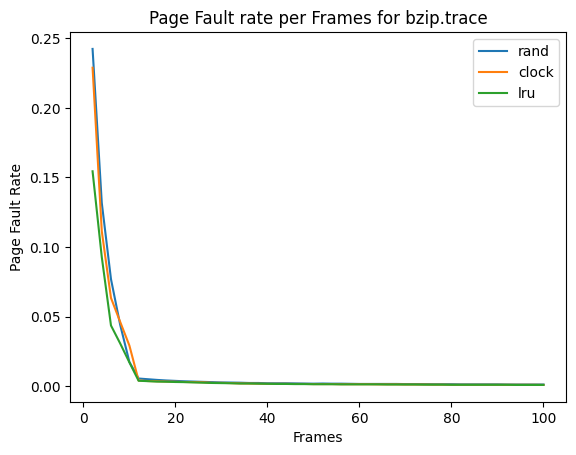

In [5]:
rand_bzip = df[ (df["File"] == "bzip.trace") & (df["Replacement"] == "rand") ]
clock_bzip = df[ (df["File"] == "bzip.trace") & (df["Replacement"] == "clock") ]
lru_bzip = df[ (df["File"] == "bzip.trace") & (df["Replacement"] == "lru") ]

# plotting
plt.title("Page Fault rate per Frames for bzip.trace")
plt.plot(rand_bzip["Frames"], rand_bzip["Page_Fault_rate"], label="rand")
plt.plot(clock_bzip["Frames"], clock_bzip["Page_Fault_rate"], label="clock")
plt.plot(lru_bzip["Frames"], lru_bzip["Page_Fault_rate"], label="lru")

plt.xlabel("Frames")
plt.ylabel("Page Fault Rate")
plt.legend()


Looking at sixpack

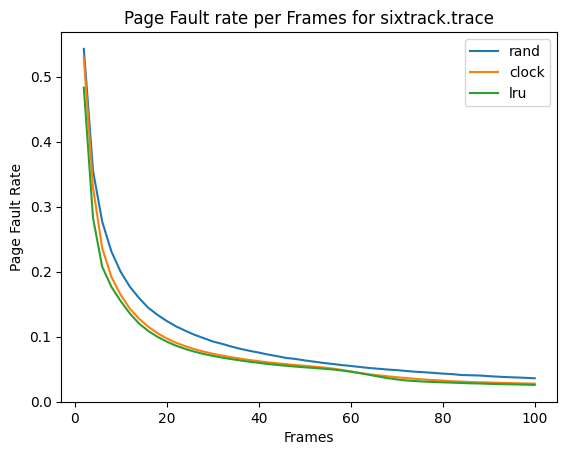

In [6]:
rand_sixpack = df[ (df["File"] == "sixpack.trace") & (df["Replacement"] == "rand") ]
clock_sixpack = df[ (df["File"] == "sixpack.trace") & (df["Replacement"] == "clock") ]
lru_sixpack = df[ (df["File"] == "sixpack.trace") & (df["Replacement"] == "lru") ]

# plotting
plt.title("Page Fault rate per Frames for sixtrack.trace")
plt.plot(rand_sixpack["Frames"], rand_sixpack["Page_Fault_rate"], label="rand")
plt.plot(clock_sixpack["Frames"], clock_sixpack["Page_Fault_rate"], label="clock")
plt.plot(lru_sixpack["Frames"], lru_sixpack["Page_Fault_rate"], label="lru")

plt.xlabel("Frames")
plt.ylabel("Page Fault Rate")
plt.legend()


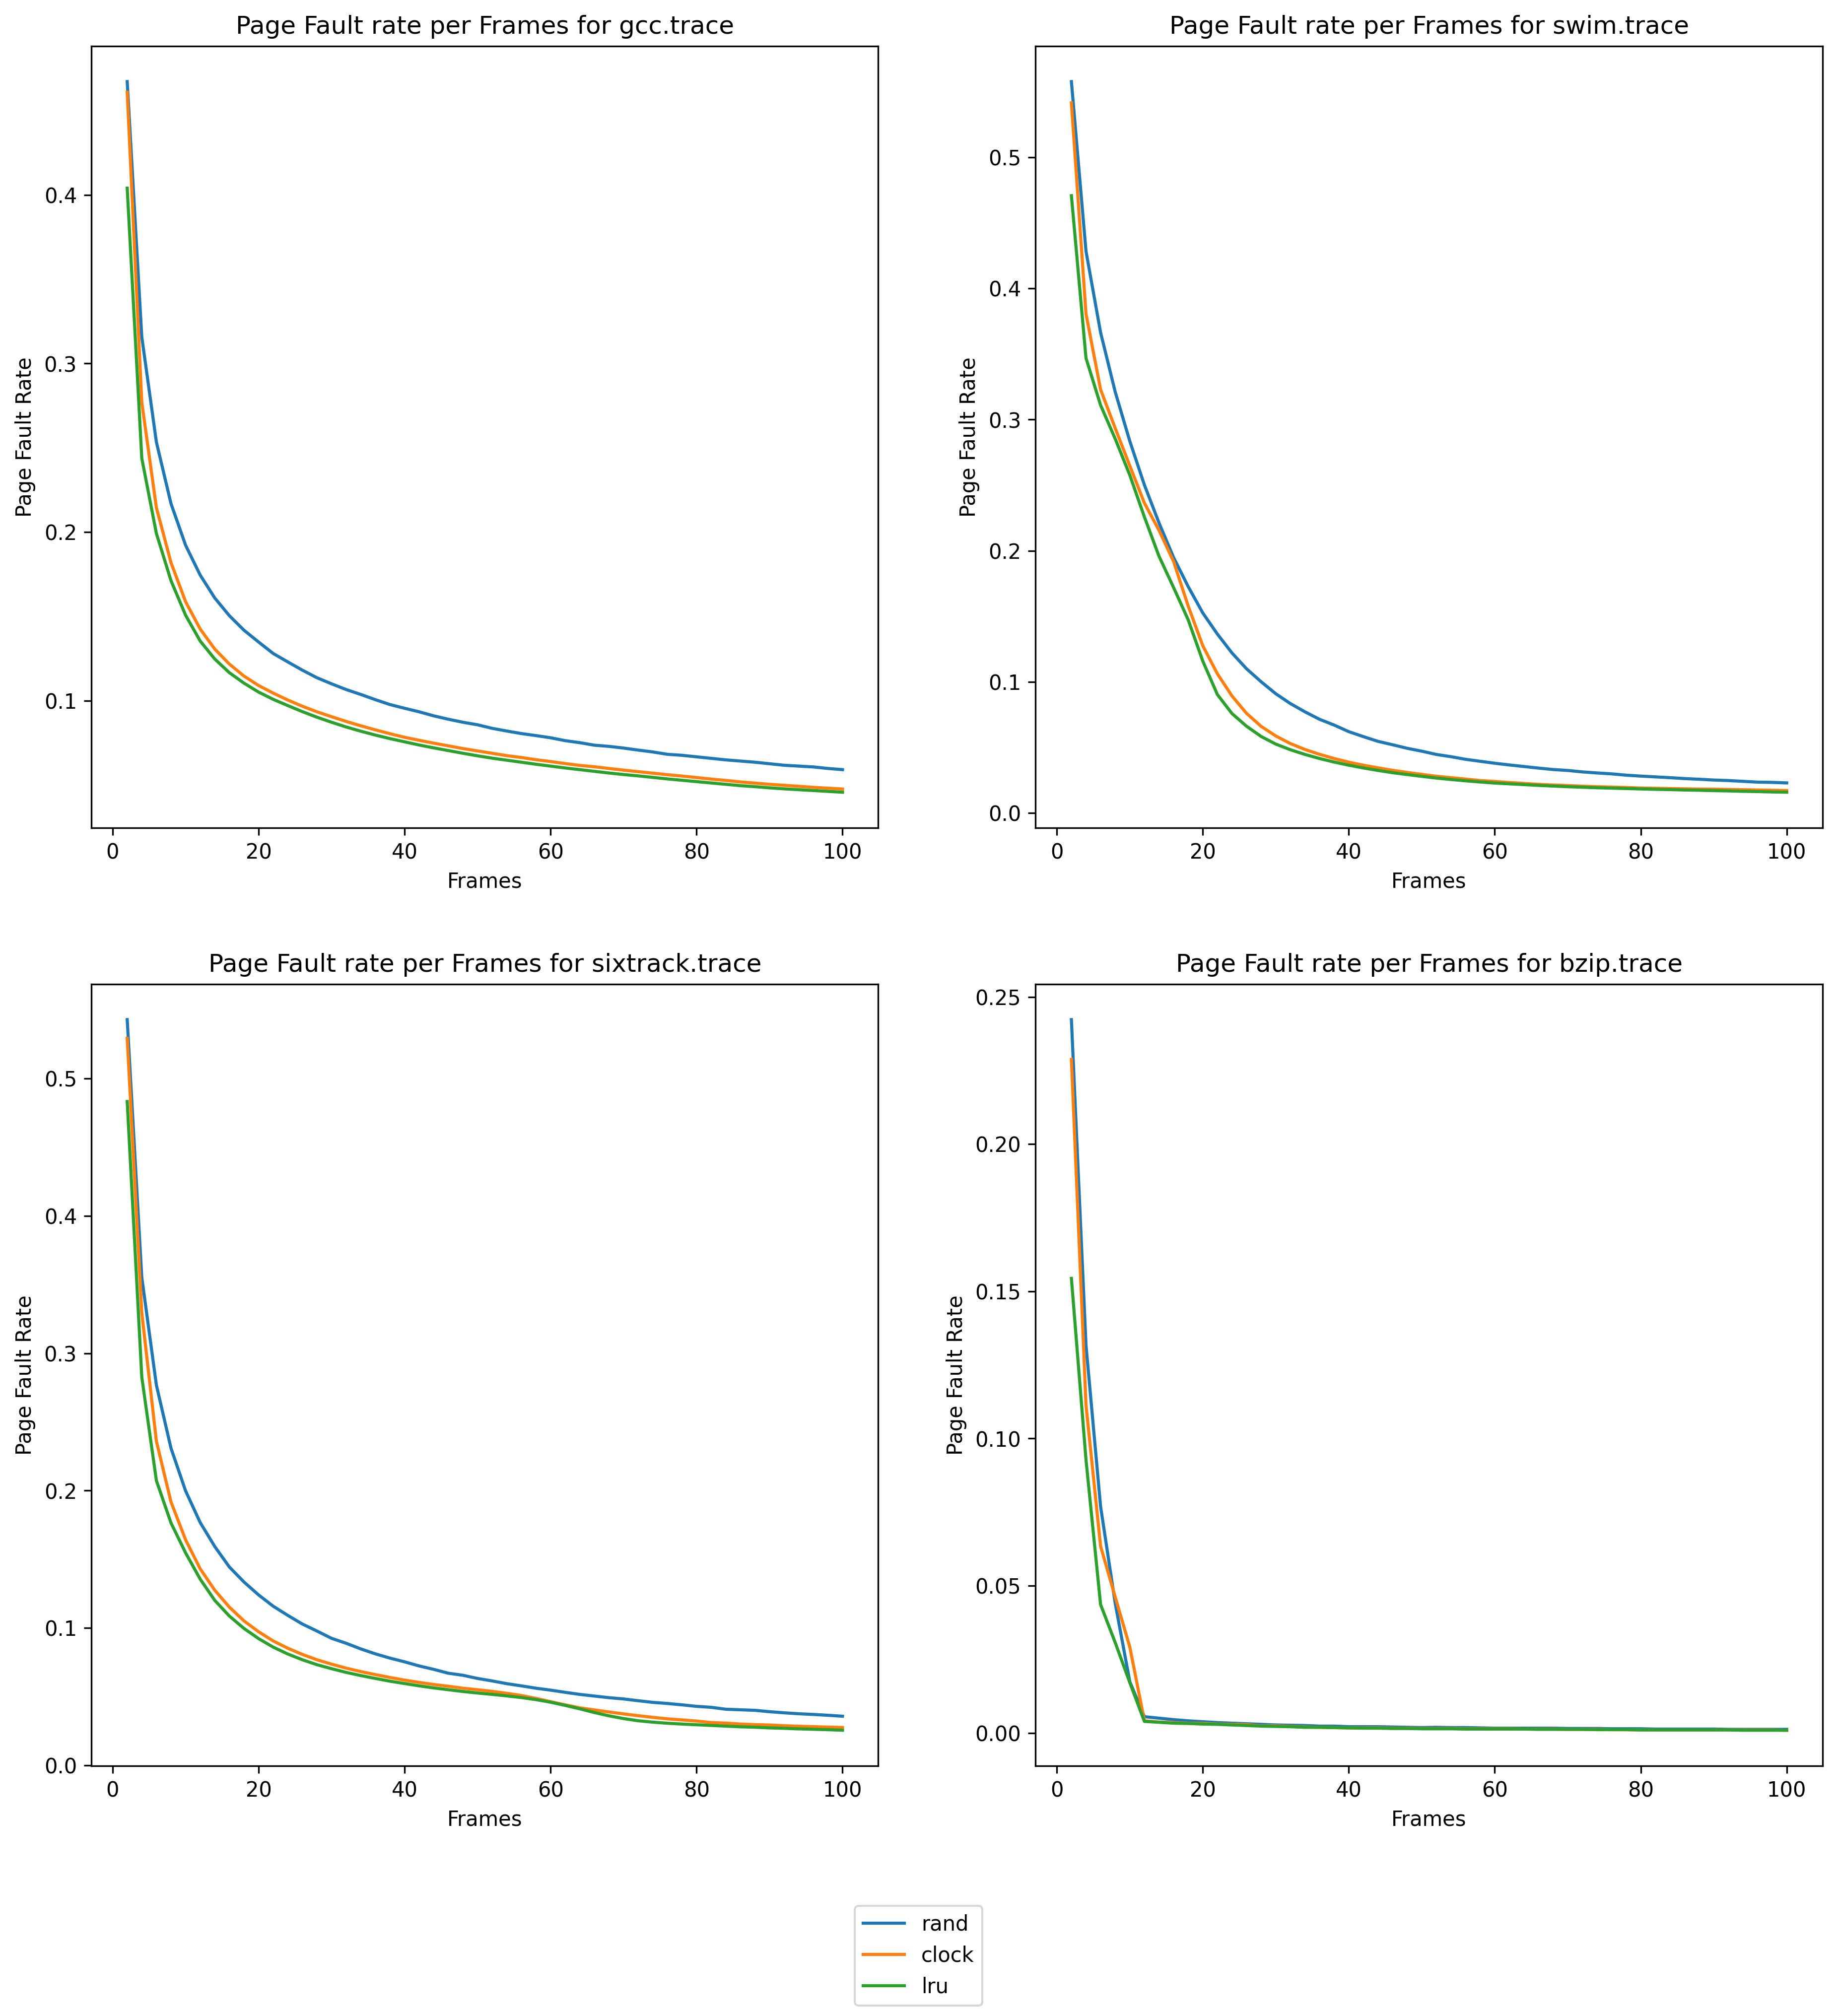

In [99]:
fig, axis = plt.subplots(2,2)
axis[0][0].set_title("Page Fault rate per Frames for gcc.trace")
axis[0][0].plot(rand_gcc["Frames"], rand_gcc["Page_Fault_rate"], label="rand")
axis[0][0].plot(clock_gcc["Frames"], clock_gcc["Page_Fault_rate"], label="clock")
axis[0][0].plot(lru_gcc["Frames"], lru_gcc["Page_Fault_rate"], label="lru")

axis[0][0].set_xlabel("Frames")
axis[0][0].set_ylabel("Page Fault Rate")

axis[0][1].set_title("Page Fault rate per Frames for swim.trace")
axis[0][1].plot(rand_swim["Frames"], rand_swim["Page_Fault_rate"])
axis[0][1].plot(clock_swim["Frames"], clock_swim["Page_Fault_rate"])
axis[0][1].plot(lru_swim["Frames"], lru_swim["Page_Fault_rate"])

axis[0][1].set_xlabel("Frames")
axis[0][1].set_ylabel("Page Fault Rate")

axis[1][1].set_title("Page Fault rate per Frames for bzip.trace")
axis[1][1].plot(rand_bzip["Frames"], rand_bzip["Page_Fault_rate"])
axis[1][1].plot(clock_bzip["Frames"], clock_bzip["Page_Fault_rate"])
axis[1][1].plot(lru_bzip["Frames"], lru_bzip["Page_Fault_rate"])

axis[1][1].set_xlabel("Frames")
axis[1][1].set_ylabel("Page Fault Rate")

axis[1][0].set_title("Page Fault rate per Frames for sixtrack.trace")
axis[1][0].plot(rand_sixpack["Frames"], rand_sixpack["Page_Fault_rate"])
axis[1][0].plot(clock_sixpack["Frames"], clock_sixpack["Page_Fault_rate"])
axis[1][0].plot(lru_sixpack["Frames"], lru_sixpack["Page_Fault_rate"])

axis[1][0].set_xlabel("Frames")
axis[1][0].set_ylabel("Page Fault Rate")
plt.rcParams['figure.figsize'] = [15,15]
# fig.legend(bbox_to_anchor=(0.85, 0.9), loc='upper left')
fig.legend(loc='lower center')

Getting the optimal values for each thing

In [ ]:
def find_significant_increase(data, threshold_percentage):
    for i in range(1, len(data)):
        previous_value = data[i - 1]
        current_value = data[i]
        
        # Calculate percentage increase
        percentage_change = ((current_value - previous_value) / previous_value) * 100
        # If the percentage change exceeds the threshold, return the index
        if percentage_change > threshold_percentage:
            return i
    
    return -1  # If no significant increase is found

import numpy as np

# Calculate percentage changes
def calculate_percentage_changes(data):
    percentage_changes = []
    for i in range(1, len(data)):
        previous_value = data[i - 1]
        current_value = data[i]
        percentage_change = ((current_value - previous_value) / previous_value) * 100
        percentage_changes.append(percentage_change)
    return percentage_changes

# Determine a significant threshold based on mean + N standard deviations
def determine_significant_threshold(percentage_changes, n_std_dev=1):
    mean_change = np.mean(percentage_changes)
    std_dev_change = np.std(percentage_changes)
    
    # Threshold is mean + N standard deviations
    significant_threshold = mean_change #
    return significant_threshold

optimal LRU values

In [86]:

# Your data
data = lru_gcc["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_lru_gcc = lru_gcc["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]
# Your data
data = lru_swim["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_lru_swim = lru_swim["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = lru_bzip["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_lru_bzip = lru_bzip["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = lru_sixpack["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_lru_sixpack = lru_sixpack["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

In [91]:
print("Optimal LRU GCC: {} Optimal LRU SWIM: {} Optimal LRU Sixpack: {} Optimal LRU Bzip: {}".format(optimal_frames_lru_gcc, optimal_frames_lru_swim, optimal_frames_lru_sixpack, optimal_frames_lru_bzip))

Optimal LRU GCC: 22 Optimal LRU SWIM: 40 Optimal LRU Sixpack: 26 Optimal LRU Bzip: 14


Optimal RAND values

In [87]:

# Your data
data = rand_gcc["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_rand_gcc = rand_gcc["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]
# Your data
data = rand_swim["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_rand_swim = rand_swim["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = rand_bzip["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_rand_bzip = rand_bzip["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = rand_sixpack["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_rand_sixpack = rand_sixpack["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

In [90]:
print("Optimal Rand GCC: {} Optimal Rand SWIM: {} Optimal Rand Sixpack: {} Optimal Rand Bzip: {}".format(optimal_frames_rand_gcc, optimal_frames_rand_swim, optimal_frames_rand_sixpack, optimal_frames_rand_bzip))

Optimal Rand GCC: 24 Optimal Rand SWIM: 38 Optimal Rand Sixpack: 28 Optimal Rand Bzip: 20


Optimal Clock values

In [88]:

# Your data
data = clock_gcc["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_clock_gcc = clock_gcc["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]
# Your data
data = clock_swim["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_clock_swim = clock_swim["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = clock_bzip["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_clock_bzip = clock_bzip["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

data = clock_sixpack["Page_Fault_rate"][::-1].to_numpy()
# Calculate percentage changes
percentage_changes = calculate_percentage_changes(data)
threshold_percentage = determine_significant_threshold(percentage_changes)

optimal_frames_clock_sixpack = clock_sixpack["Frames"][::-1].iloc[find_significant_increase(data, threshold_percentage)]

In [89]:
print("Optimal Clock GCC: {} Optimal Clock SWIM: {} Optimal Clock Sixpack: {} Optimal Clock Bzip: {}".format(optimal_frames_clock_gcc, optimal_frames_clock_swim, optimal_frames_clock_sixpack, optimal_frames_clock_bzip))

Optimal Clock GCC: 22 Optimal Clock SWIM: 42 Optimal Clock Sixpack: 26 Optimal Clock Bzip: 16
